# Instance Segmentation

In [13]:
!unzip BRAIN-TUMOR.zip

Archive:  BRAIN-TUMOR.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/y154_jpg.rf.bcc8bca03d5c754b1c3fecab26584b79.jpg  
 extracting: test/images/y172_jpg.rf.1de5e52261087615739339dfec693873.jpg  
 extracting: test/images/y17_jpg.rf.00e73d21eb12c3ad8e3cb3b5a87805b8.jpg  
 extracting: test/images/y192_jpg.rf.d4ef756fbf9c0fd35dc411b61f8aa184.jpg  
 extracting: test/images/y193_jpg.rf.898204dcdfcff60fff55f3734567e205.jpg  
 extracting: test/images/y193_jpg.rf.d75ad28b5fae3f14d696dfc98ef3d326.jpg  
 extracting: test/images/y196_jpg.rf.cb679791b2f16798391d0a24d51aca4c.jpg  
 extracting: test/images/y197_jpg.rf.bf846157858d9835059250fd69f91316.jpg  
 extracting: test/images/y203_jpg.rf.5eac47d062461c86f0e045bc27423a8b.jpg  
 extracting: test/images/y206_jpg.rf.02264d8bb70ebe5362289d7e7530bf0a.jpg  
 extracting: test/images/y20_jpg.rf.abe2b70248a1bbf48d3f

In [16]:
from ultralytics import YOLO

# Load the model
model = YOLO("yolo11n-seg.pt")

# Train the model
train_results = model.train(
    data="/content/data.yaml",
    epochs=10,
    imgsz = 640,
    device=0,
)

Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=/content/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

100%|██████████| 755k/755k [00:00<00:00, 15.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/train/labels... 583 images, 2 backgrounds, 0 corrupt: 100%|██████████| 583/583 [00:00<00:00, 2074.33it/s]

train: New cache created: /content/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/valid/labels... 123 images, 1 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<00:00, 1458.68it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.99G      1.122      2.399      3.004      1.324          7        640: 100%|██████████| 37/37 [00:20<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        123        126       0.97      0.256      0.725      0.425       0.97      0.256      0.703      0.378



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.95G      1.095      1.918      2.049      1.259          7        640: 100%|██████████| 37/37 [00:14<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        123        126      0.734      0.444      0.546      0.307      0.546      0.262      0.259      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.95G      1.126      1.821      1.763      1.282          7        640: 100%|██████████| 37/37 [00:14<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        123        126      0.626      0.677      0.683      0.373      0.611      0.635      0.646      0.349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.95G      1.056      1.739      1.499      1.241          7        640: 100%|██████████| 37/37 [00:14<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        123        126      0.669      0.627      0.694      0.458      0.669      0.627      0.693      0.452



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.95G      1.037       1.71      1.304        1.2          7        640: 100%|██████████| 37/37 [00:14<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        123        126      0.848      0.913      0.873      0.612      0.856      0.921      0.874      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.95G     0.9768      1.562      1.079      1.151          8        640: 100%|██████████| 37/37 [00:14<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all        123        126      0.935      0.897      0.951      0.688      0.926      0.889      0.937      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.95G     0.9314      1.513     0.9673      1.152          8        640: 100%|██████████| 37/37 [00:14<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all        123        126       0.93      0.976      0.974      0.715       0.93      0.976      0.974      0.724



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.95G     0.9136      1.455      0.896      1.131          7        640: 100%|██████████| 37/37 [00:14<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all        123        126      0.945      0.957      0.982      0.735      0.945      0.957      0.982      0.737



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.95G     0.8357      1.381     0.7888      1.091          8        640: 100%|██████████| 37/37 [00:14<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        123        126      0.974      0.968      0.991      0.763      0.974      0.968      0.991      0.751



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.95G     0.7737      1.283     0.7363      1.042          7        640: 100%|██████████| 37/37 [00:14<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        123        126      0.984      0.954      0.992      0.762      0.984      0.954      0.992      0.749



10 epochs completed in 0.051 hours.
Optimizer stripped from runs/segment/train2/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train2/weights/best.pt, 6.0MB

Validating runs/segment/train2/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.15s/it]


                   all        123        126      0.973      0.968      0.991      0.763      0.973      0.968      0.991      0.749
Speed: 0.4ms preprocess, 4.2ms inference, 0.0ms loss, 5.7ms postprocess per image
Results saved to runs/segment/train2


In [7]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

# Object Detection Using Pretrained Model

In [9]:
import cv2
from ultralytics import YOLO

# Load the pre-trained YOLOv11 model
model = YOLO('yolo11n.pt')  # 'n' denotes the nano version; choose 's', 'm', 'l', or 'x' for larger models

# Load the input image
image_path = 'https://www.bing.com/th?id=OIP.QjynegEfQVPq5kIEuX9fWQHaFj&w=337&h=200&c=8&rs=1&qlt=90&o=6&pid=3.1&rm=2'  # Replace with your image file path
image = cv2.imread(image_path)

# Perform object detection
results = model(image)

# Visualize and save the results
annotated_image = results[0].plot()  # Annotate the image with bounding boxes and labels
output_path = 'output_image.jpg'
cv2.imwrite(output_path, annotated_image)

print(f"Detection completed. Results saved to {output_path}.")


WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.11/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 43.8ms
image 2/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 1 tie, 52.0ms
Speed: 9.2ms preprocess, 47.9ms inference, 173.8ms postprocess per image at shape (1, 3, 384, 640)
Detection completed. Results saved to output_image.jpg.


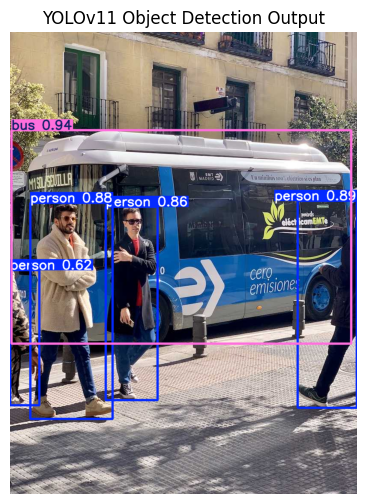

In [11]:
import matplotlib.pyplot as plt

annotated_image = results[0].plot()
annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# Display the image in Kaggle Notebook
plt.figure(figsize=(10, 6))
plt.imshow(annotated_image_rgb)
plt.axis("off")  # Hide axis
plt.title("YOLOv11 Object Detection Output")
plt.show()